In [1]:
%load_ext autoreload
%autoreload 2
# You can load your python module as this:
import dataproject.example

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dataproject.example.hello_world()

'hello world'

In [93]:
# Import varios packages used in the Project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Fetching data from Statistics Denmark using an API
import pydst
dst = pydst.Dst(lang='da')

In [94]:
dst.get_data(table_id = 'mpk39')

,INDTUDG,TID,INDHOLD
0,Antal pengeinstitutter,1991,214


In [95]:
indk_vars = dst.get_variables(table_id='MPK39')
indk_vars['values'][0][:12]

[{'id': '3960', 'text': 'Antal pengeinstitutter'},
 {'id': '3970', 'text': 'Antal ansatte, ultimo året'},
 {'id': '3980', 'text': '+Renteindtægter'},
 {'id': '3990', 'text': '-Renteudgifter'},
 {'id': '4000', 'text': 'Renteindtægter, netto'},
 {'id': '4010', 'text': '+Udbytte af aktier mv. og andre kapitalandele'},
 {'id': '4020', 'text': '+Gebyrer og provisionsindtægter'},
 {'id': '4030', 'text': '-Afgivne gebyrer og provisionsindtægter'},
 {'id': '4040', 'text': 'Rente- og gebyrindtægter, netto'},
 {'id': '4050', 'text': '+Kursstigning på værdipapirer og valuta'},
 {'id': '4060', 'text': '+Andre ordinære indtægter'},
 {'id': '4070', 'text': 'Resultat af finansielle poster'}]

In [96]:
# Import data for Cash Institutes income statement by revenue / expenditure from Denmark Statistics - all of table mpk39.
mpk39_true = dst.get_data(table_id='MPK39', variables = {'INDTUDG':['*'], 'TID':['*']})

In [97]:
# Overview of the data:
mpk39_true.sample(100)

,INDTUDG,TID,INDHOLD
111,"Antal ansatte, ultimo året",1995,43010
451,Resultat af finansielle poster,2010,87852
530,+Renteindtægter,2015,59800
496,-Udgifter til personale og administration,2012,48800
293,-Afgivne gebyrer og provisionsindtægter,2003,2625
300,-Andre driftsudgifter,2003,311
282,+Ekstraordinærer indtægter (netto),2002,0
50,+Gebyrer og provisionsindtægter,1992,5507
86,-Skat,1993,2101
526,-Skat,2014,2160


In [98]:
# Consider the following dictionary definitions:
columns_dict = {}
columns_dict['INDTUDG'] = 'variable'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

# var is for variable
var_dict = {} 
var_dict['+Gebyrer og provisionsindtægter'] = 'Gebyrindtaegter'
var_dict['-Afgivne gebyrer og provisionsindtægter'] = 'Gebyromkostninger'
var_dict['+Andre ordinære indtægter'] = 'Ordinaer'
var_dict['+Udbytte af aktier mv. og andre kapitalandele'] = 'Aktier'
var_dict['Renteindtægter, netto'] = 'Nettorente'




In [99]:
# Structuring the data and selects variables concerning the institues revenues.

# a) Rename the columns using columns_dict  
mpk39_true.rename(columns=columns_dict,inplace=True)

# b) replace data using var_dict 
for key,value in var_dict.items():
   mpk39_true.variable.replace(key,value,inplace=True)

# c) keep the variables in var_dict
I = False
for key,value in var_dict.items():
    I = I | (mpk39_true.variable == value)
mpk39_true = mpk39_true[I]
   
# d) convert values to numeric
mpk39_true.value = mpk39_true.value.astype('float')

# e) summary statistics
mpk39_true.groupby(['variable']).describe()

value                                                \
                  count          mean           std      min      25%   
variable                                                                
Aktier             27.0    949.222222    594.243108    349.0    632.5   
Gebyrindtaegter    27.0  18249.703704   8836.358734   5199.0  10041.5   
Gebyromkostninger  27.0   3480.444444   2183.287259    675.0   1296.0   
Nettorente         27.0  38900.370370  10724.081220  27372.0  29895.5   
Ordinaer           27.0   2657.703704   1614.015342    852.0   1302.0   

                                              year                            \
                       50%      75%      max count    mean       std     min   
variable                                                                       
Aktier               791.0   1098.0   2914.0  27.0  2004.0  7.937254  1991.0   
Gebyrindtaegter    17654.0  24856.5  33356.0  27.0  2004.0  7.937254  1991.0   
Gebyromkostninger   2940.0   5786.5   6351.0  27.0  2004.0  7.937254  1991.0   
Nettorente         36359.0  45794.5  69403.0  27.0  2004.0  7.937254  1991.0   
Ordinaer            2790.0   3553.5   7958.0  27.0  2004.0  7.937254  1991.0   

                                                   
                      25%     50%     75%     max  
variable                                           
Aktier             1997.5  2004.0  2010.5  2017.0  
Gebyrindtaegter    1997.5  2004.0  2010.5  2017.0  
Gebyromkostninger  1997.5  2004.0  2010.5  2017.0  
Nettorente         1997.5  2004.0  2010.5  2017.0  
Ordinaer           1997.5  2004.0  2010.5  2017.0

In [100]:
mpk39_true

,variable,year,value
4,Nettorente,2013,47116.0
5,Aktier,2013,2482.0
6,Gebyrindtaegter,2013,26971.0
7,Gebyromkostninger,2013,6351.0
10,Ordinaer,2013,3018.0
26,Nettorente,1991,29299.0
27,Aktier,1991,409.0
28,Gebyrindtaegter,1991,5199.0
29,Gebyromkostninger,1991,676.0
32,Ordinaer,1991,939.0


In [84]:
# a. split
mpk39_true_grouped = mpk39_true.groupby(['year','variable'])




In [86]:
mpk39_true_grouped.describe().head(10)

value                                                   \
                       count     mean std      min      25%      50%      75%   
year variable                                                                   
1991 Aktier              1.0    409.0 NaN    409.0    409.0    409.0    409.0   
     Gebyrindtaegter     1.0   5199.0 NaN   5199.0   5199.0   5199.0   5199.0   
     Gebyromkostninger   1.0    676.0 NaN    676.0    676.0    676.0    676.0   
     Nettorente          1.0  29299.0 NaN  29299.0  29299.0  29299.0  29299.0   
     Ordinaer            1.0    939.0 NaN    939.0    939.0    939.0    939.0   
1992 Aktier              1.0    662.0 NaN    662.0    662.0    662.0    662.0   
     Gebyrindtaegter     1.0   5507.0 NaN   5507.0   5507.0   5507.0   5507.0   
     Gebyromkostninger   1.0    800.0 NaN    800.0    800.0    800.0    800.0   
     Nettorente          1.0  28928.0 NaN  28928.0  28928.0  28928.0  28928.0   
     Ordinaer            1.0    941.0 NaN    941.0    941.0    941.0    941.0   

                                first             ...                       \
                            max count     mean    ...         75%      max   
year variable                                     ...                        
1991 Aktier               409.0   1.0   2482.0    ...      2482.0   2482.0   
     Gebyrindtaegter     5199.0   1.0  26971.0    ...     26971.0  26971.0   
     Gebyromkostninger    676.0   1.0   6351.0    ...      6351.0   6351.0   
     Nettorente         29299.0   1.0  47116.0    ...     47116.0  47116.0   
     Ordinaer             939.0   1.0   3018.0    ...      3018.0   3018.0   
1992 Aktier               662.0   1.0   2482.0    ...      2482.0   2482.0   
     Gebyrindtaegter     5507.0   1.0  26971.0    ...     26971.0  26971.0   
     Gebyromkostninger    800.0   1.0   6351.0    ...      6351.0   6351.0   
     Nettorente         28928.0   1.0  47116.0    ...     47116.0  47116.0   
     Ordinaer             941.0   1.0   3018.0    ...      3018.0   3018.0   

                       indexed                                              \
                         count      mean std       min       25%       50%   
year variable                                                                
1991 Aktier                1.0  0.164786 NaN  0.164786  0.164786  0.164786   
     Gebyrindtaegter       1.0  0.192763 NaN  0.192763  0.192763  0.192763   
     Gebyromkostninger     1.0  0.106440 NaN  0.106440  0.106440  0.106440   
     Nettorente            1.0  0.621848 NaN  0.621848  0.621848  0.621848   
     Ordinaer              1.0  0.311133 NaN  0.311133  0.311133  0.311133   
1992 Aktier                1.0  0.266720 NaN  0.266720  0.266720  0.266720   
     Gebyrindtaegter       1.0  0.204182 NaN  0.204182  0.204182  0.204182   
     Gebyromkostninger     1.0  0.125964 NaN  0.125964  0.125964  0.125964   
     Nettorente            1.0  0.613974 NaN  0.613974  0.613974  0.613974   
     Ordinaer              1.0  0.311796 NaN  0.311796  0.311796  0.311796   

                                            
                             75%       max  
year variable                               
1991 Aktier             0.164786  0.164786  
     Gebyrindtaegter    0.192763  0.192763  
     Gebyromkostninger  0.106440  0.106440  
     Nettorente         0.621848  0.621848  
     Ordinaer           0.311133  0.311133  
1992 Aktier             0.266720  0.266720  
     Gebyrindtaegter    0.204182  0.204182  
     Gebyromkostninger  0.125964  0.125964  
     Nettorente         0.613974  0.613974  
     Ordinaer           0.311796  0.311796  

[10 rows x 24 columns]

ValueError: Unrecognized character a in format string

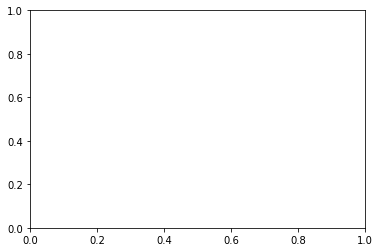

In [88]:
plt.plot('year','variable')
plt.show()